# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

SAT and ACT is a mean to get into college. Hence, majority of the students either take SAT or ACT depending on their views and perceptions on how good they are in either one. Very rarely, students take both. In the past, SAT has been viewed as an aptitude test which is different from ACT which is academic based. The perception of SAT is that, aptitude is difficult to acquire through study. But this has changed in recent year as SAT is more balance similar to ACT and it even has composition as an option similar to ACT. Conversely, ACT has also change adopting SAT style in recent years.

To increase SAT participation rate means, students have to be convinced that SAT is not diffcult and in recent years and has moved towards a more balance approach similar to ACT rather than only aptitude based which has a misconception that it is difficult to learn (https://www.thoughtco.com/differences-between-sat-and-act-exams-788714).

The college board must be able to educate students and parents about the structure of SAT is more balance and achievable and sufficient budgets are given to the respective states to provide good high school education and test prep helping more students to succeed via the SAT route.


## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [1]:
#Import relevant libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Read csv data files and assign it to dataframe:
sat2017 = pd.read_csv('D:\\1GA_DSI_Local\\classes\\project_1\\data\\sat_2017.csv')
act2017 = pd.read_csv('D:\\1GA_DSI_Local\\classes\\project_1\\data\\act_2017.csv')

In [3]:
# Make a copy of the dataframes.
sat2017_c = sat2017.copy()
act2017_c = act2017.copy()

#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#View first 10 rows of sat2017 dataframe.
sat2017.head(10)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [5]:
#View first 10 rows of act2017 dataframe.
act2017.head(10)

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


In [6]:
print(sat2017.info()); print('\n')
print(act2017.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
None


In [7]:
# Function to remove % symbol from 'Participation' column and convert
# the results to floats
def remove_pct_symbol(df_name, col_header = 'Participation'):
    try:
        df_name[col_header] = df_name[col_header].apply(lambda pct: float(pct.replace('%','')))
    except:
        print('Column header already include % symbol')

# Function to add % to the 'Participation' column
def addpct_to_col_header(df_name, col_header):
    df_name.rename(columns = {col_header: col_header + '%'}, inplace=True)

# Remove % from 'Participation' column and tag a '%' symbol
# to the 'Participation' column header for both dataframes.
remove_pct_symbol(act2017)
addpct_to_col_header(act2017, 'Participation')
remove_pct_symbol(sat2017)
addpct_to_col_header(sat2017, 'Participation')


In [8]:
# Sort sat2017 dataframe by 'Participation%'.
sat2017.sort_values(by = ['Participation%'], ascending = True, inplace = True)

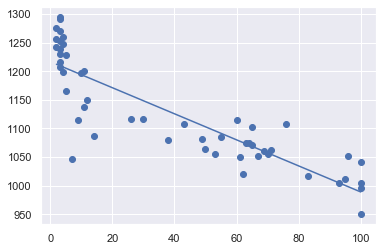

In [9]:
# Plot a scatter graph to see is there a correlation between 
# participation rate and scores. The graph clearly show that there
# is a negative correlation between participation rate and scores.
sat_x = sat2017['Participation%']
sat_y = sat2017['Total']
plt.scatter(sat_x, sat_y)
plt.plot(np.unique(sat_x), np.poly1d(np.polyfit(sat_x, sat_y, 1))(np.unique(sat_x)))

In [10]:
# Data cleaning for act2017.
# Remove x from last row of 'Composite' column and convert the column to float
act2017['Composite'] = act2017['Composite'].apply(lambda _: float(_.replace('x','')))

In [11]:
# Remove row with 'State' == National from act2017
act2017.drop(index = act2017[act2017['State'] == 'National'].index, inplace = True)

In [12]:
# Sort act2017 dataframe by 'Participation%' for scatter plot.
act2017.sort_values(by = ['Participation%'], ascending = True, inplace = True)

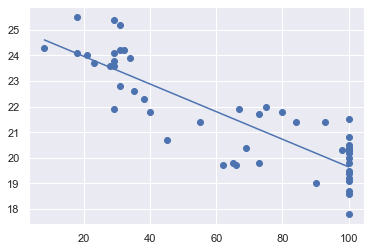

In [13]:
# Plot a scatter graph to see is there a correlation between 
# participation rate and scores. The graph clearly show that there
# is a negative correlation between participation rate and scores.
act_x = act2017['Participation%']
act_y = act2017['Composite']
plt.scatter(act_x, act_y)
plt.plot(np.unique(act_x), np.poly1d(np.polyfit(act_x, act_y, 1))(np.unique(act_x)))

In [14]:
sat2017.describe()

,Participation%,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000,51.000000
mean,39.803922,569.117647,547.627451,1126.098039
std,35.276632,45.666901,84.909119,92.494812
min,2.000000,482.000000,52.000000,950.000000
25%,4.000000,533.500000,522.000000,1055.500000
50%,38.000000,559.000000,548.000000,1107.000000
75%,66.000000,613.000000,599.000000,1212.000000
max,100.000000,644.000000,651.000000,1295.000000


In [15]:
act2017.describe()

,Participation%,English,Math,Reading,Science,Composite
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000


In [16]:
act2017[['State', 'Participation%', 'Composite']]

,State,Participation%,Composite
20,Maine,8.0,24.3
30,New Hampshire,18.0,25.5
8,Delaware,18.0,24.1
40,Rhode Island,21.0,24.0
39,Pennsylvania,23.0,23.7
21,Maryland,28.0,23.6
46,Vermont,29.0,23.6
22,Massachusetts,29.0,25.4
23,Michigan,29.0,24.1
47,Virginia,29.0,23.8


In [18]:
sat2017.head()

,State,Participation%,Evidence-Based Reading and Writing,Math,Total
34,North Dakota,2.0,635,621,1256
24,Mississippi,2.0,634,607,1242
15,Iowa,2.0,641,635,1275
25,Missouri,3.0,640,631,1271
44,Utah,3.0,624,614,1238


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

Answer: 
sat2017 contains 51 rows by 5 columns while act2017 contains 52 rows by 7 columns. A quick check using '.isnull()' for both dataframes shows that there is no missing values which is good. However, some data wrangling is still required to;
1. get rid of % symbol in the 'Participation' column for both dataframe (df).
2. get rid of the 'x' in row 52 column 'Composite' in the act2017 df.
3. convert 'Participation' columns in both df and 'Composite' column in act2017 df from string to float to do a scatter plot.

SAT:
From the stats summary (.describe());
- Participation rate is completely out of whack. The min is 2% while the max is 100%.
- The disparity between the min and max scores is very wide too and is far from the mean.
- By far, the EBRW (Evidence-Based Reading and Writing) scores looks normal. The differnece between the min and max scores are not too wide and are close to the mean.
- The same cannot be said for Math because the 25%, 50%, 75% quartiles and the max is quite close to the mean but the min is 496 away from the mean (min: 52; mean: 548). Looks like Maryland state is the outlier. Ignoring this outlier, the min should be 468 from District of Columbia which is similar as EBRW.
- The min and the max total score is wide as well as the standard deviation is almost 2 standard deviation from the mean based on the min and max.
- There is a negative correlation between participation rate and total scores as shown in the scatter plot.


ACT:
- Participation rate is only slightly better than SAT but still very bad; min: 8% and amx: 100%.
- Although there is a negative correlation between participation rate and Composite score but generally, the overall scores for the 4 subjects and composite are quite consisent ie, the observations are closer to the mean compared to SAT and the ACT standard deviation is small.


#### 4a. Does the data look complete? 

Answer:
Other than the minor data wrangling, the data look complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

Answer:

Since the participation rate varies significantly between states, it has a huge impact on state average SAT/ ACT scores. Thus, unless the raw average SAT/ ACT scores are adjusted ie. removes the biasness caused by participation rate, any analysis done using the raw average score may not be accurate.


#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [19]:
#Code
None

#### 5. What are your data types? 
Display the data types of each feature. 

In [19]:
#code
print(sat2017_c.info()); print('\n')
print(act2017_c.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB
None


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
'''

sat2017 contains 51 rows by 5 columns while act2017 contains 52 rows
by 7 columns. A quick check using '.isnull()' for both dataframes shows 
that there is no missing values. However, some data wrangling 
is still required to convert 'Participation' for both dataframes and 'Composite' for act2017 dataframe to numeric values in order analysis can be done.

1. get rid of % symbol in the 'Participation' column for both dataframe (df).

2. get rid of the 'x' in row 52 column 'Composite' in the act2017 df.

3. convert 'Participation' columns in both df and 'Composite' column in 
act2017 df from string to float to do a scatter plot.

All of these already completed in the cells above before the scatter plots. Please refer to the comments in the respective cells.

'''

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [20]:
#code
# Function to remove % symbol from 'Participation' column and convert
# the results to floats
def remove_pct_symbol(df_name, col_header = 'Participation'):
    try:
        df_name[col_header] = df_name[col_header].apply(lambda pct: float(pct.replace('%','')))
    except:
        print('Column header already include % symbol')

# Remove % from 'Participation' column for both dataframes.
remove_pct_symbol(act2017)
remove_pct_symbol(sat2017)

Column header already include % symbol
Column header already include % symbol


- Fix any individual values preventing other columns from being the appropriate type.

In [21]:
act2017.head()

,State,Participation%,English,Math,Reading,Science,Composite
20,Maine,8.0,24.2,24.0,24.8,23.7,24.3
30,New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5
8,Delaware,18.0,24.1,23.4,24.8,23.6,24.1
40,Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0
39,Pennsylvania,23.0,23.4,23.4,24.2,23.3,23.7


In [22]:
#code
# Set states as index since states are unique values. This way,
# it is easier to retrieve rows by using state as search criteria.
def set_states_as_index(df):
    try:
        df.set_index('State', inplace = True)
        print(f'{df} States has set as index.')
    except:
        print(f'States of {df} is already an index.')

# Uncomment the below 2 statements to set states as index.        
set_states_as_index(act2017)
set_states_as_index(sat2017)


                      Participation%  English  Math  Reading  Science  \
State                                                                   
Maine                            8.0     24.2  24.0     24.8     23.7   
New Hampshire                   18.0     25.4  25.1     26.0     24.9   
Delaware                        18.0     24.1  23.4     24.8     23.6   
Rhode Island                    21.0     24.0  23.3     24.7     23.4   
Pennsylvania                    23.0     23.4  23.4     24.2     23.3   
Maryland                        28.0     23.3  23.1     24.2      2.3   
Vermont                         29.0     23.3  23.1     24.4     23.2   
Massachusetts                   29.0     25.4  25.3     25.9     24.7   
Michigan                        29.0     24.1  23.7     24.5     23.8   
Virginia                        29.0     23.5  23.3     24.6     23.5   
Washington                      29.0     20.9  21.9     22.1     22.0   
California                      31.0     22.5  22.7

In [23]:
#code
# Remove x from last row of 'Composite' column in act2017 and 
# convert the entire column to float.
if act2017.loc['Wyoming']['Composite'] == 20.2:
    print('No action required.')
else:
    act2017['Composite'] = act2017['Composite'].apply(lambda _: float(_.replace('x','')))

No action required.


- Display the data types again to confirm they are correct.

In [24]:
#Code:
# Print out the dataframe structure for both dataframes.
print(sat2017.info()); print('\n')
print(act2017.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, North Dakota to Connecticut
Data columns (total 4 columns):
Participation%                        51 non-null float64
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: float64(1), int64(3)
memory usage: 2.0+ KB
None


<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Maine to Wyoming
Data columns (total 6 columns):
Participation%    51 non-null float64
English           51 non-null float64
Math              51 non-null float64
Reading           51 non-null float64
Science           51 non-null float64
Composite         51 non-null float64
dtypes: float64(6)
memory usage: 5.3+ KB
None


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [25]:
#code
# First get the existing list of column headers with the below code.
sat2017.columns.values
# A list of column headers will be generated. Simply copy the list.

# Here are the column headers from sat2017 in a list from the above code.
# ['Participation%', 'Evidence-Based Reading and Writing', 'Math', 'Total']
# Modify the list with new column headers.
newcolheaders = ['2017_SAT_Parti%', '2017_SAT_EBRW', '2017_SAT_Math', '2017_SAT_Total']
# Now rename all the columns at one-go.
print(sat2017.columns)
sat2017.columns = newcolheaders
sat2017.columns.values

# Repeat for dataframe  act2017
act2017.columns.values
# Exsiting column headers
# ['Participation%', 'English', 'Math', 'Reading', 'Science', 'Composite']
newcolheaders = ['2017_ACT_Parti%', '2017_ACT_English', '2017_ACT_Math', 
                 '2017_ACT_Reading', '2017_ACT_Science', '2017_ACT_Composite']
act2017.columns = newcolheaders
act2017.columns.values


Index(['Participation%', 'Evidence-Based Reading and Writing', 'Math',
       'Total'],
      dtype='object')


array(['2017_ACT_Parti%', '2017_ACT_English', '2017_ACT_Math',
       '2017_ACT_Reading', '2017_ACT_Science', '2017_ACT_Composite'],
      dtype=object)

In [26]:
act2017.head(3)

,2017_ACT_Parti%,2017_ACT_English,2017_ACT_Math,2017_ACT_Reading,2017_ACT_Science,2017_ACT_Composite
State,,,,,,
Maine,8.0,24.2,24.0,24.8,23.7,24.3
New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5
Delaware,18.0,24.1,23.4,24.8,23.6,24.1


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|State|object|ACT/SAT|States of America|
|Participation|float|ACT/SAT|Students' participation rate in % that has taken the ACT/SAT exam
|EBRW**|float|SAT|Combination of reading and writing score
|Math|float|ACT/SAT|Math score
|English|float|ACT|English score
|Reading|float|ACT|Reading score
|Science|float|ACT|Science score
|Total|float|SAT|Total SAT score for EBRW and Math
|Composite|float|ACT|Total ACT score for the ACT 4 subjects

** EBRW: Evidence-Based Reading and Writing




#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [27]:
# Remove row with 'State' == National from act2017 so as to be consistent with
# sat2017 which does not have overall 'National' score result.
def remove_state_from_df(df, state):
    try:
        df.drop(index = df[df['State'] == state].index, inplace=True)
    except:
        print(f'Target dataframe does not contain {state}')

remove_state_from_df('act2017', state='National')

Target dataframe does not contain National


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [28]:
# Merge act2017 and sat2017 dataframes
print(act2017.head(1))
act_sat2017 = pd.merge(act2017, sat2017, how = 'left', on = 'State')

       2017_ACT_Parti%  2017_ACT_English  2017_ACT_Math  2017_ACT_Reading  \
State                                                                       
Maine              8.0              24.2           24.0              24.8   

       2017_ACT_Science  2017_ACT_Composite  
State                                        
Maine              23.7                24.3  


In [29]:
act_sat2017.head(5)

,2017_ACT_Parti%,2017_ACT_English,2017_ACT_Math,2017_ACT_Reading,2017_ACT_Science,2017_ACT_Composite,2017_SAT_Parti%,2017_SAT_EBRW,2017_SAT_Math,2017_SAT_Total
State,,,,,,,,,,
Maine,8.0,24.2,24.0,24.8,23.7,24.3,95.0,513,499,1012
New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,96.0,532,520,1052
Delaware,18.0,24.1,23.4,24.8,23.6,24.1,100.0,503,492,996
Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,71.0,539,524,1062
Pennsylvania,23.0,23.4,23.4,24.2,23.3,23.7,65.0,540,531,1071


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [30]:
# Saving combined results of act2017 and sat2017 in csv format.
act_sat2017.to_csv('D:\\1GA_DSI_Local\\classes\\project_1\\data\\output\\act_sat_combined_2017.csv')

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [31]:
# I picked act_2018.csv instead of act_2018_updated.csv because I want to practice
# data cleaning as act_2018 has duplicated state (Maine) and type error of District of 'c'olumbia 
act2018 = pd.read_csv('D:\\1GA_DSI_Local\\classes\\project_1\\data\\act_2018.csv')
sat2018 = pd.read_csv('D:\\1GA_DSI_Local\\classes\\project_1\\data\\sat_2018.csv')

In [32]:
# See how many columns and name of column headers
act2018.columns

Index(['State', 'Participation', 'Composite'], dtype='object')

In [33]:
print(act2017.count())
print(act2018.count())
act2018['State'].value_counts().head(3)
# There is a duplicate row in act2018; State is Maine

2017_ACT_Parti%       51
2017_ACT_English      51
2017_ACT_Math         51
2017_ACT_Reading      51
2017_ACT_Science      51
2017_ACT_Composite    51
dtype: int64
State            52
Participation    52
Composite        52
dtype: int64


Maine            2
New Hampshire    1
New Mexico       1
Name: State, dtype: int64

In [34]:
# Remove duplicated Maine state.
filt = act2018['State'] == 'Maine'
print(act2018.loc[filt])
act2018.drop(index = 19, inplace = True)
print(act2018.loc[filt])

    State Participation  Composite
19  Maine            7%       24.0
20  Maine            7%       24.0
    State Participation  Composite
20  Maine            7%       24.0


In [35]:
# Spotted the type error of District of 'c'olumbia
act2018.head(9)

,State,Participation,Composite
0,Alabama,100%,19.1
1,Alaska,33%,20.8
2,Arizona,66%,19.2
3,Arkansas,100%,19.4
4,California,27%,22.7
5,Colorado,30%,23.9
6,Connecticut,26%,25.6
7,Delaware,17%,23.8
8,District of columbia,32%,23.6


In [36]:
# Clean up state 'District of Columbia' by changing the 'c' to upper case.
act2018.iloc[8,0] = 'District of Columbia'
act2018.iloc[8,0]

'District of Columbia'

In [37]:
# Remove % from 'Participation' column and tag a '%' symbol
# to the 'Participation' column header for both dataframes.
remove_pct_symbol(act2018)
addpct_to_col_header(act2018, 'Participation')

In [38]:
# Check results
act2018.head(3)

,State,Participation%,Composite
0,Alabama,100.0,19.1
1,Alaska,33.0,20.8
2,Arizona,66.0,19.2


In [39]:
# Set states as index since states are unique values. This way,
# it is easier to retrieve rows by using state as search criteria.
set_states_as_index(act2018)

                      Participation%  Composite
State                                          
Alabama                        100.0       19.1
Alaska                          33.0       20.8
Arizona                         66.0       19.2
Arkansas                       100.0       19.4
California                      27.0       22.7
Colorado                        30.0       23.9
Connecticut                     26.0       25.6
Delaware                        17.0       23.8
District of Columbia            32.0       23.6
Florida                         66.0       19.9
Georgia                         53.0       21.4
Hawaii                          89.0       18.9
Idaho                           36.0       22.3
Illinois                        43.0       23.9
Indiana                         32.0       22.5
Iowa                            68.0       21.8
Kansas                          71.0       21.6
Kentucky                       100.0       20.2
Louisiana                      100.0    

In [40]:
# Rename column headers for dataframe act2018 to be consistent with act2017 
act2018.columns.values
# Exsiting column headers
# ['Participation%', 'Composite']
newcolheaders = ['2018_ACT_Parti%', '2018_ACT_Composite']
act2018.columns = newcolheaders
act2018.columns.values

array(['2018_ACT_Parti%', '2018_ACT_Composite'], dtype=object)

In [41]:
act2018.head(1)

,2018_ACT_Parti%,2018_ACT_Composite
State,,
Alabama,100.0,19.1


In [42]:
# Take a look at the dtype
sat2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [43]:
# Check that there is no missing values
sat2018.notnull().count()

State                                 51
Participation                         51
Evidence-Based Reading and Writing    51
Math                                  51
Total                                 51
dtype: int64

In [44]:
# A quick look at the df structure
sat2018.head(3)

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,6%,595,571,1166
1,Alaska,43%,562,544,1106
2,Arizona,29%,577,572,1149


In [45]:
# Set states as index since states are unique values. This way,
# it is easier to retrieve rows by using state as search criteria.
set_states_as_index(sat2018)

                     Participation  Evidence-Based Reading and Writing  Math  \
State                                                                          
Alabama                         6%                                 595   571   
Alaska                         43%                                 562   544   
Arizona                        29%                                 577   572   
Arkansas                        5%                                 592   576   
California                     60%                                 540   536   
Colorado                      100%                                 519   506   
Connecticut                   100%                                 535   519   
Delaware                      100%                                 505   492   
District of Columbia           92%                                 497   480   
Florida                        56%                                 550   549   
Georgia                        70%      

In [46]:
# Remove % from Participation column and tag % to the column header
remove_pct_symbol(sat2018)
addpct_to_col_header(sat2018, 'Participation')

In [47]:
# Check results
sat2018.head(3)

,Participation%,Evidence-Based Reading and Writing,Math,Total
State,,,,
Alabama,6.0,595,571,1166
Alaska,43.0,562,544,1106
Arizona,29.0,577,572,1149


In [48]:
# First get the existing list of column headers with the below code.
sat2018.columns.values
# A list of column headers will be generated. Simply copy the list.

# Here are the column headers from sat2017 in a list from the above code.
# ['Participation%', 'Evidence-Based Reading and Writing', 'Math', 'Total']
# Modify the list with new column headers.
newcolheaders = ['2018_SAT_Parti%', '2018_SAT_EBRW', '2018_SAT_Math', '2018_SAT_Total']
# Now rename all the columns at one-go.
sat2018.columns = newcolheaders
sat2018.columns.values

array(['2018_SAT_Parti%', '2018_SAT_EBRW', '2018_SAT_Math',
       '2018_SAT_Total'], dtype=object)

In [49]:
# Check results
sat2018.head(1)

,2018_SAT_Parti%,2018_SAT_EBRW,2018_SAT_Math,2018_SAT_Total
State,,,,
Alabama,6.0,595,571,1166


#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [50]:
# Check to ensure participation rates for both dataframes are the same dtype
print(act2017.info())
print(act2018.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Maine to Wyoming
Data columns (total 6 columns):
2017_ACT_Parti%       51 non-null float64
2017_ACT_English      51 non-null float64
2017_ACT_Math         51 non-null float64
2017_ACT_Reading      51 non-null float64
2017_ACT_Science      51 non-null float64
2017_ACT_Composite    51 non-null float64
dtypes: float64(6)
memory usage: 5.3+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 2 columns):
2018_ACT_Parti%       51 non-null float64
2018_ACT_Composite    51 non-null float64
dtypes: float64(2)
memory usage: 1.2+ KB
None


In [51]:
# Merge act2017 and act2018 together using state as the common index
act_combined = pd.merge(act2017, act2018, how = 'left', on = 'State')

In [52]:
# Saving combined results of act2017 and sat2017 in csv format.
act_combined.to_csv('D:\\1GA_DSI_Local\\classes\\project_1\\data\\output\\act_combined.csv')

In [53]:
# Check to ensure participation rates for both dataframes are the same dtype
print(sat2017.info())
print(sat2018.info())

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, North Dakota to Connecticut
Data columns (total 4 columns):
2017_SAT_Parti%    51 non-null float64
2017_SAT_EBRW      51 non-null int64
2017_SAT_Math      51 non-null int64
2017_SAT_Total     51 non-null int64
dtypes: float64(1), int64(3)
memory usage: 2.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, Alabama to Wyoming
Data columns (total 4 columns):
2018_SAT_Parti%    51 non-null float64
2018_SAT_EBRW      51 non-null int64
2018_SAT_Math      51 non-null int64
2018_SAT_Total     51 non-null int64
dtypes: float64(1), int64(3)
memory usage: 2.0+ KB
None


In [54]:
# Merge sat2017 and sat2018 together using state as the common index
sat_combined = pd.merge(sat2017, sat2018, how = 'left', on = 'State')

In [55]:
# Saving combined results of act2017 and sat2017 in csv format.
sat_combined.to_csv('D:\\1GA_DSI_Local\\classes\\project_1\\data\\output\\sat_combined.csv')

In [56]:
# Merge act2017, act2018, sat2017 and sat2018 together using state as the common index
final = pd.merge(act_combined, sat_combined, how = 'left', on = 'State')

In [57]:
# Saving combined results of act and sat final.csv.
final.to_csv('D:\\1GA_DSI_Local\\classes\\project_1\\data\\output\\final.csv')

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [58]:
#Code:
final.describe()

,2017_ACT_Parti%,2017_ACT_English,2017_ACT_Math,2017_ACT_Reading,2017_ACT_Science,2017_ACT_Composite,2018_ACT_Parti%,2018_ACT_Composite,2017_SAT_Parti%,2017_SAT_EBRW,2017_SAT_Math,2017_SAT_Total,2018_SAT_Parti%,2018_SAT_EBRW,2018_SAT_Math,2018_SAT_Total
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,65.254902,20.931373,21.182353,22.013725,21.041176,21.519608,61.725490,21.496078,39.803922,569.117647,547.627451,1126.098039,45.745098,563.686275,556.235294,1120.019608
std,32.140842,2.353677,1.981989,2.067271,3.182463,2.020695,34.037085,2.111583,35.276632,45.666901,84.909119,92.494812,37.314256,47.502627,47.772623,94.155083
min,8.000000,16.300000,18.000000,18.100000,2.300000,17.800000,7.000000,17.700000,2.000000,482.000000,52.000000,950.000000,2.000000,480.000000,480.000000,977.000000
25%,31.000000,19.000000,19.400000,20.450000,19.900000,19.800000,28.500000,19.950000,4.000000,533.500000,522.000000,1055.500000,4.500000,534.500000,522.500000,1057.500000
50%,69.000000,20.700000,20.900000,21.800000,21.300000,21.400000,66.000000,21.300000,38.000000,559.000000,548.000000,1107.000000,52.000000,552.000000,544.000000,1098.000000
75%,100.000000,23.300000,23.100000,24.150000,22.750000,23.600000,100.000000,23.650000,66.000000,613.000000,599.000000,1212.000000,77.500000,610.500000,593.500000,1204.000000
max,100.000000,25.500000,25.300000,26.000000,24.900000,25.500000,100.000000,25.600000,100.000000,644.000000,651.000000,1295.000000,100.000000,643.000000,655.000000,1298.000000


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [59]:
# Population Standard deviation function
def std_dev(data):
    p_mean = data.mean()
    n = len(data)
    sum_of_diff_xu = 0
    for x in data:
        sum_of_diff_xu += (x - p_mean) ** 2
    
    return (sum_of_diff_xu/ n) ** 0.5

data = np.arange(10, 60, 10)
print(std_dev(data))

14.142135623730951


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [60]:
# Use a dictionary comprehension to apply your standard deviation function 
# to each numeric column in the dataframe.
col_list = list(final.columns)
sd = {}
sd.update({col_list[i]: round(std_dev(final.iloc[:,i]),6) for i in range(0,16)}) 

print(type(sd))
sd

<class 'dict'>


{'2017_ACT_Parti%': 31.824176,
 '2017_ACT_English': 2.330488,
 '2017_ACT_Math': 1.962462,
 '2017_ACT_Reading': 2.046903,
 '2017_ACT_Science': 3.151108,
 '2017_ACT_Composite': 2.000786,
 '2018_ACT_Parti%': 33.701736,
 '2018_ACT_Composite': 2.090779,
 '2017_SAT_Parti%': 34.929071,
 '2017_SAT_EBRW': 45.21697,
 '2017_SAT_Math': 84.072555,
 '2017_SAT_Total': 91.583511,
 '2018_SAT_Parti%': 36.946619,
 '2018_SAT_EBRW': 47.03461,
 '2018_SAT_Math': 47.301946,
 '2018_SAT_Total': 93.227424}

In [61]:
# Ceck results
final.std()

2017_ACT_Parti%       32.140842
2017_ACT_English       2.353677
2017_ACT_Math          1.981989
2017_ACT_Reading       2.067271
2017_ACT_Science       3.182463
2017_ACT_Composite     2.020695
2018_ACT_Parti%       34.037085
2018_ACT_Composite     2.111583
2017_SAT_Parti%       35.276632
2017_SAT_EBRW         45.666901
2017_SAT_Math         84.909119
2017_SAT_Total        92.494812
2018_SAT_Parti%       37.314256
2018_SAT_EBRW         47.502627
2018_SAT_Math         47.772623
2018_SAT_Total        94.155083
dtype: float64

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:
Sight difference in the decimals but, overall, can match up.

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [63]:
# Make a copy of the final df, set the index as a new column.
final_c = final.copy()
final_c['State'] = final_c.index
#final_c.reset_index(drop=True, inplace = True)
final_c.head(5)

,2017_ACT_Parti%,2017_ACT_English,2017_ACT_Math,2017_ACT_Reading,2017_ACT_Science,2017_ACT_Composite,2018_ACT_Parti%,2018_ACT_Composite,2017_SAT_Parti%,2017_SAT_EBRW,2017_SAT_Math,2017_SAT_Total,2018_SAT_Parti%,2018_SAT_EBRW,2018_SAT_Math,2018_SAT_Total,State
State,,,,,,,,,,,,,,,,,
Maine,8.0,24.2,24.0,24.8,23.7,24.3,7.0,24.0,95.0,513,499,1012,99.0,512,501,1013,Maine
New Hampshire,18.0,25.4,25.1,26.0,24.9,25.5,16.0,25.1,96.0,532,520,1052,96.0,535,528,1063,New Hampshire
Delaware,18.0,24.1,23.4,24.8,23.6,24.1,17.0,23.8,100.0,503,492,996,100.0,505,492,998,Delaware
Rhode Island,21.0,24.0,23.3,24.7,23.4,24.0,15.0,24.2,71.0,539,524,1062,97.0,513,505,1018,Rhode Island
Pennsylvania,23.0,23.4,23.4,24.2,23.3,23.7,20.0,23.5,65.0,540,531,1071,70.0,547,539,1086,Pennsylvania


In [64]:
# Mississippi, Iowa and North Dakota has the lowest participation rate for SAT 2017
df = final[['2017_ACT_Parti%', '2018_ACT_Parti%', '2017_SAT_Parti%', '2018_SAT_Parti%']]
df.reset_index(inplace = True)
df.sort_values(by = '2017_SAT_Parti%', ascending = True).head(4)[['State','2017_SAT_Parti%']]

,State,2017_SAT_Parti%
43,Mississippi,2.0
24,Iowa,2.0
33,North Dakota,2.0
50,Wyoming,3.0


In [65]:
#District of Columbia, Michigan, Delaware, Connecticut has the highest participation rate for SAT 2017
df.sort_values(by = '2017_SAT_Parti%', ascending = False).head(5)[['State', '2017_SAT_Parti%']]

,State,2017_SAT_Parti%
14,District of Columbia,100.0
8,Michigan,100.0
2,Delaware,100.0
13,Connecticut,100.0
1,New Hampshire,96.0


In [66]:
# Only Maine has the lowest participation rate for ACT 2017
df.sort_values(by ='2017_ACT_Parti%', ascending = True).head(2)[['State', '2017_ACT_Parti%']]

,State,2017_ACT_Parti%
0,Maine,8.0
1,New Hampshire,18.0


In [68]:
# There are 17 states with highest participation rate of 100% for ACT 2017
df.sort_values(by ='2017_ACT_Parti%', ascending = False).head(18)[['State', '2017_ACT_Parti%']]

,State,2017_ACT_Parti%
50,Wyoming,100.0
42,Wisconsin,100.0
34,South Carolina,100.0
35,Utah,100.0
36,Tennessee,100.0
37,Alabama,100.0
38,Missouri,100.0
40,Nevada,100.0
41,Montana,100.0
39,North Carolina,100.0


In [69]:
# North Dakota has the lowest participation rate for SAT 2018
df.sort_values(by='2018_SAT_Parti%', ascending = True).head(2)[['State', '2018_SAT_Parti%']]

,State,2018_SAT_Parti%
33,North Dakota,2.0
50,Wyoming,3.0


In [70]:
# Michigan, Delaware, Colorado, Idaho, Connecticut and Maine 
# has the highest participation rate for SAT 2018
df.sort_values(by='2018_SAT_Parti%', ascending = False).head(6)[['State', '2018_SAT_Parti%']]

,State,2018_SAT_Parti%
8,Michigan,100.0
2,Delaware,100.0
47,Colorado,100.0
17,Idaho,100.0
13,Connecticut,100.0
0,Maine,99.0


In [71]:
# Only Maine has the lowest participation rate for ACT 2018
df.sort_values(by='2018_ACT_Parti%', ascending = True).head(2)[['State', '2018_ACT_Parti%']]

,State,2018_ACT_Parti%
0,Maine,7.0
3,Rhode Island,15.0


In [136]:
# There are 18 states with highest participation rate of 100% for ACT 2018
df.sort_values(by='2018_ACT_Parti%', ascending = False).head(18)[['State', '2018_ACT_Parti%']]

,State,2018_ACT_Parti%
50,Wyoming,100.0
40,Nevada,100.0
28,Ohio,100.0
30,Nebraska,100.0
34,South Carolina,100.0
35,Utah,100.0
36,Tennessee,100.0
38,Missouri,100.0
39,North Carolina,100.0
37,Alabama,100.0


In [72]:
# States that have the highest and lowest mean total/composite scores for ACT and SAT 2018/ 2018.
# Extracting a dataframe out from the final dataframe, make the index 'State' as a column and 
# drop the index.
df = final[['2017_ACT_Composite', '2018_ACT_Composite', '2017_SAT_Total', '2018_SAT_Total']] 
df['State'] = df.index
df.reset_index(drop=True, inplace = True)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [73]:
# States that have the highest and lowest mean total/composite scores for ACT and SAT 2018/ 2018.

def display_results(year, exam, level, state, score):
    print(f'{year} {level} mean score for {exam} was {state} {score}')

state, score = df.min()[['State', '2017_ACT_Composite']]
display_results(2017, 'ACT', 'lowest', state, score)

state, score = df.max()[['State', '2017_ACT_Composite']]
display_results(2017, 'ACT', 'highest', state, score)

state, score = df.min()[['State', '2017_SAT_Total']]
display_results(2017, 'SAT', 'lowest', state, score)

state, score = df.max()[['State', '2017_SAT_Total']]
display_results(2017, 'SAT', 'highest', state, score)

state, score = df.min()[['State', '2018_ACT_Composite']]
display_results(2018, 'ACT', 'lowest', state, score)

state, score = df.max()[['State', '2018_ACT_Composite']]
display_results(2018, 'ACT', 'highest', state, score)

state, score = df.min()[['State', '2018_SAT_Total']]
display_results(2018, 'SAT', 'lowest', state, score)

state, score = df.max()[['State', '2018_SAT_Total']]
display_results(2018, 'SAT', 'highest', state, score)


2017 lowest mean score for ACT was Alabama 17.8
2017 highest mean score for ACT was Wyoming 25.5
2017 lowest mean score for SAT was Alabama 950
2017 highest mean score for SAT was Wyoming 1295
2018 lowest mean score for ACT was Alabama 17.7
2018 highest mean score for ACT was Wyoming 25.6
2018 lowest mean score for SAT was Alabama 977
2018 highest mean score for SAT was Wyoming 1298


Do any states with 100% participation on a given test have a rate change year-to-year?

In [74]:
# Make a new df from final_c.
df1 = final_c[['State', '2017_ACT_Parti%', '2018_ACT_Parti%', '2017_SAT_Parti%', '2018_SAT_Parti%']] 
df1.reset_index(drop=True, inplace = True)

In [75]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
# Yes, there are: 2017 vs 2018; there are 2 states. 2018 vs 2017; there are 2 states.
filt = (df1['2017_ACT_Parti%'] == 100) & (df1['2018_ACT_Parti%'] != 100)
act17vs18 = df1.loc[filt][['State', '2017_ACT_Parti%', '2018_ACT_Parti%']]

filt = (df1['2018_ACT_Parti%'] == 100) & (df1['2017_ACT_Parti%'] != 100)
act18vs17 = df1.loc[filt][['State', '2018_ACT_Parti%', '2017_ACT_Parti%']]

print(act17vs18)
print(act18vs17)

        State  2017_ACT_Parti%  2018_ACT_Parti%
44  Minnesota            100.0             99.0
47   Colorado            100.0             30.0
       State  2018_ACT_Parti%  2017_ACT_Parti%
28      Ohio            100.0             75.0
30  Nebraska            100.0             84.0


In [76]:
# Do any states with 100% participation on a given test have a rate change year-to-year?
# Yes, there are: 2017 vs 2018; there is 1 state. 2018 vs 2017; there are 2 states.
filt = (df1['2017_SAT_Parti%'] == 100) & (df1['2018_SAT_Parti%'] != 100)
sat17vs18 = df1.loc[filt][['State', '2017_SAT_Parti%', '2018_SAT_Parti%']]

filt = (df1['2018_SAT_Parti%'] == 100) & (df1['2017_SAT_Parti%'] != 100)
sat18vs17 = df1.loc[filt][['State', '2018_SAT_Parti%', '2017_SAT_Parti%']]

print(sat17vs18); print('\n')
print(sat18vs17)

                   State  2017_SAT_Parti%  2018_SAT_Parti%
14  District of Columbia            100.0             92.0


       State  2018_SAT_Parti%  2017_SAT_Parti%
17     Idaho            100.0             93.0
47  Colorado            100.0             11.0


Do any states show have >50% participation on both tests either year?

In [77]:
# Do any states show have >50% participation on both tests either year?
filt = (df1['2017_ACT_Parti%'] > 50) | (df1['2018_ACT_Parti%'] > 50)
print(df1.loc[filt][['State', '2017_ACT_Parti%', '2018_ACT_Parti%']])

filt = (df1['2017_SAT_Parti%'] > 50) | (df1['2018_SAT_Parti%'] > 50)
print(df1.loc[filt][['State', '2017_SAT_Parti%', '2018_SAT_Parti%']])


             State  2017_ACT_Parti%  2018_ACT_Parti%
20         Georgia             55.0             53.0
21         Arizona             62.0             66.0
22          Alaska             65.0             33.0
23      New Mexico             66.0             67.0
24            Iowa             67.0             68.0
25   West Virginia             69.0             65.0
26          Kansas             73.0             71.0
27         Florida             73.0             66.0
28            Ohio             75.0            100.0
29    South Dakota             80.0             77.0
30        Nebraska             84.0            100.0
31          Hawaii             90.0             89.0
32        Illinois             93.0             43.0
33    North Dakota             98.0             98.0
34  South Carolina            100.0            100.0
35            Utah            100.0            100.0
36       Tennessee            100.0            100.0
37         Alabama            100.0           

Based on what you've just observed, have you identified any states that you're 
especially interested in? Make a note of these and state why you think they're interesting.

Answer:
Per observation, Colorado is very interesting because participation rate dropped from 100% in 2017 to only 30% in 2018 for ACT. There was a massive exodus from ACT and migrated to SAT for 2 states;

ACT:  
Colorado from 100% in 2017 to 30% in 2018  
Illinois from 93% in 2017 to 43% in 2018

SAT:  
Colorado from 11% in 2017 to 100% in 2018  
Illinois from 9% in 2017 to 99% in 2018

You should comment on your findings at each step in a markdown cell below your code block. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

Text(66.453125, 0.5, 'ACT/ SAT Participation Rate')

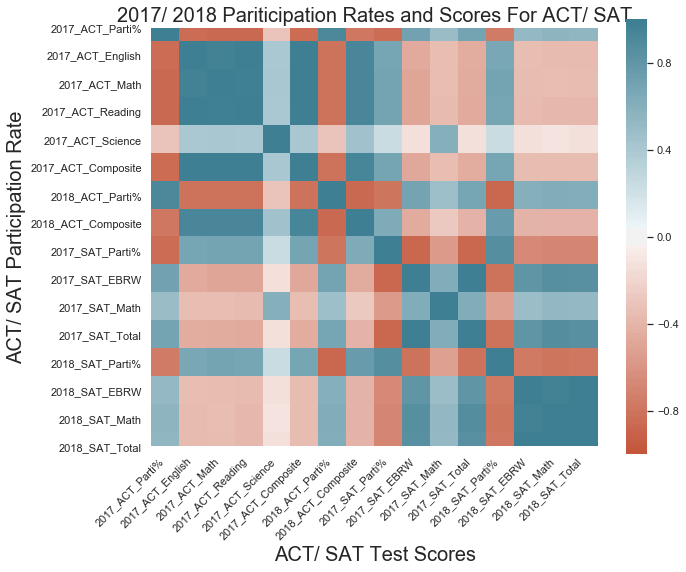

In [78]:
# Establish size of figure.
plt.figure(figsize=(10,8))
ax = sns.heatmap(final_c.corr(),
                vmin=-1, vmax=1, center=0,
                cmap=sns.diverging_palette(20, 220, n=200),
                 square = True
                )
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.title('2017/ 2018 Pariticipation Rates and Scores For ACT/ SAT', fontsize = 20)
plt.xlabel('ACT/ SAT Test Scores', fontsize = 20)
plt.ylabel('ACT/ SAT Participation Rate', fontsize = 20)

Answer:  

Green means positively and red means negatively correlated.
Heatmap is quite hard to read and interpret thus can put business off easily.
However, it provides a quick visual aid to spot whether correlations existing between features.
Fromn the above heatmap, it looks like the respective tests are positively correlated to itself.

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [79]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels, list_of_ylabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15,15)) # To specify  figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=20)
        ax[i].set_ylabel(list_of_ylabels[i], fontsize=20)
        ax[i].set_title(list_of_titles[i], fontsize=20)

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

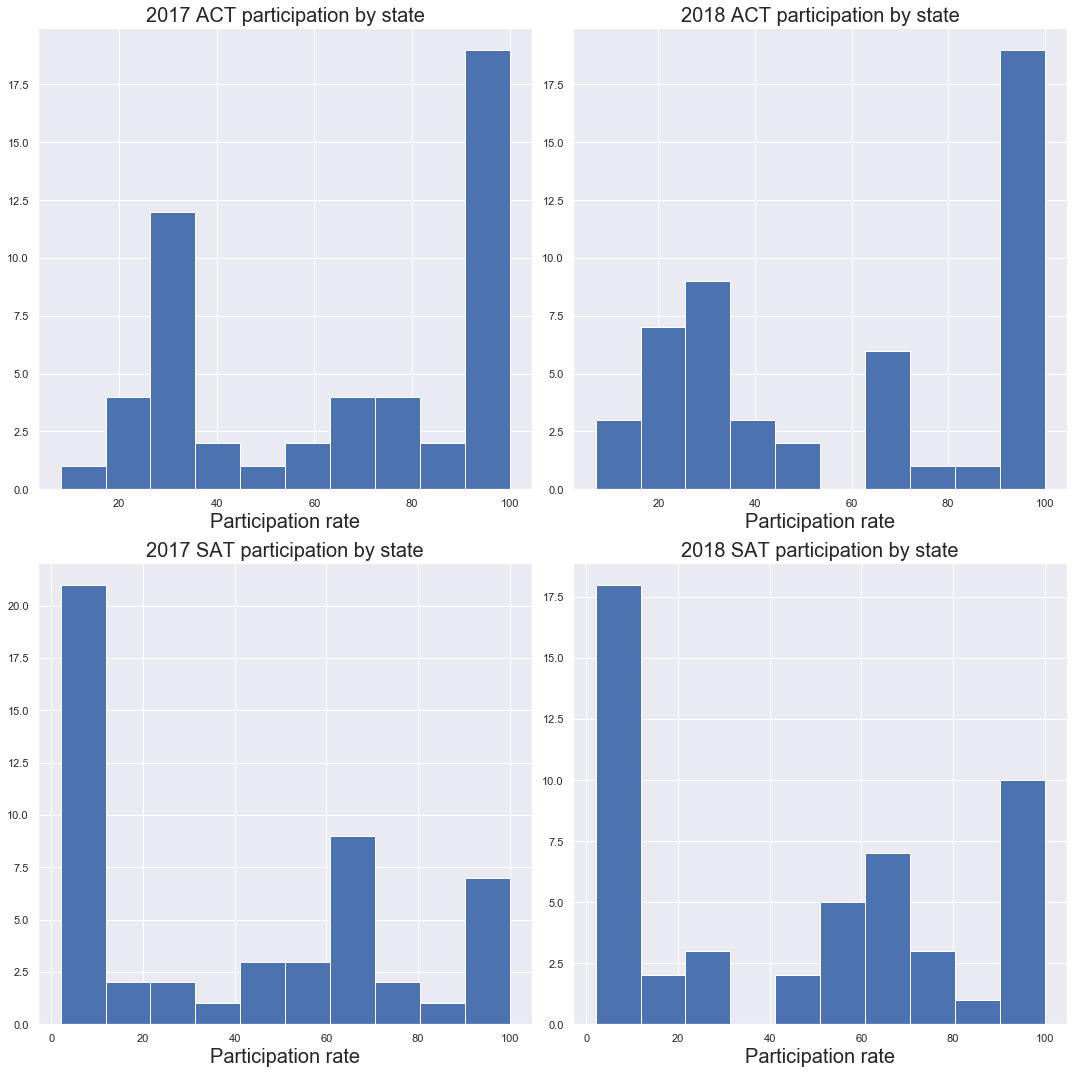

In [80]:
# Subplot Participation rates for SAT & ACT
# df1 consist of SAT/ ACT participation rates for 2017/ 2018

subplot_histograms(df1,
                   ['2017_ACT_Parti%', '2018_ACT_Parti%', '2017_SAT_Parti%', '2018_SAT_Parti%'],
                   
                   ['2017 ACT participation by state', '2018 ACT participation by state', '2017 SAT participation by state', '2018 SAT participation by state'],
                   
                   ['Participation rate', 'Participation rate', 'Participation rate', 'Participation rate'],
                   ['Number of States', 'Number of States', 'Number of States', 'Number of States'])

plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)


In [81]:
# Add 2017_ACT_English and 2017_ACT_Reading scores together and place the results in a new column '2017_ACT_ER' in df final_c
final_c['2017_ACT_ER'] = final_c['2017_ACT_English'] + final_c['2017_ACT_Reading']

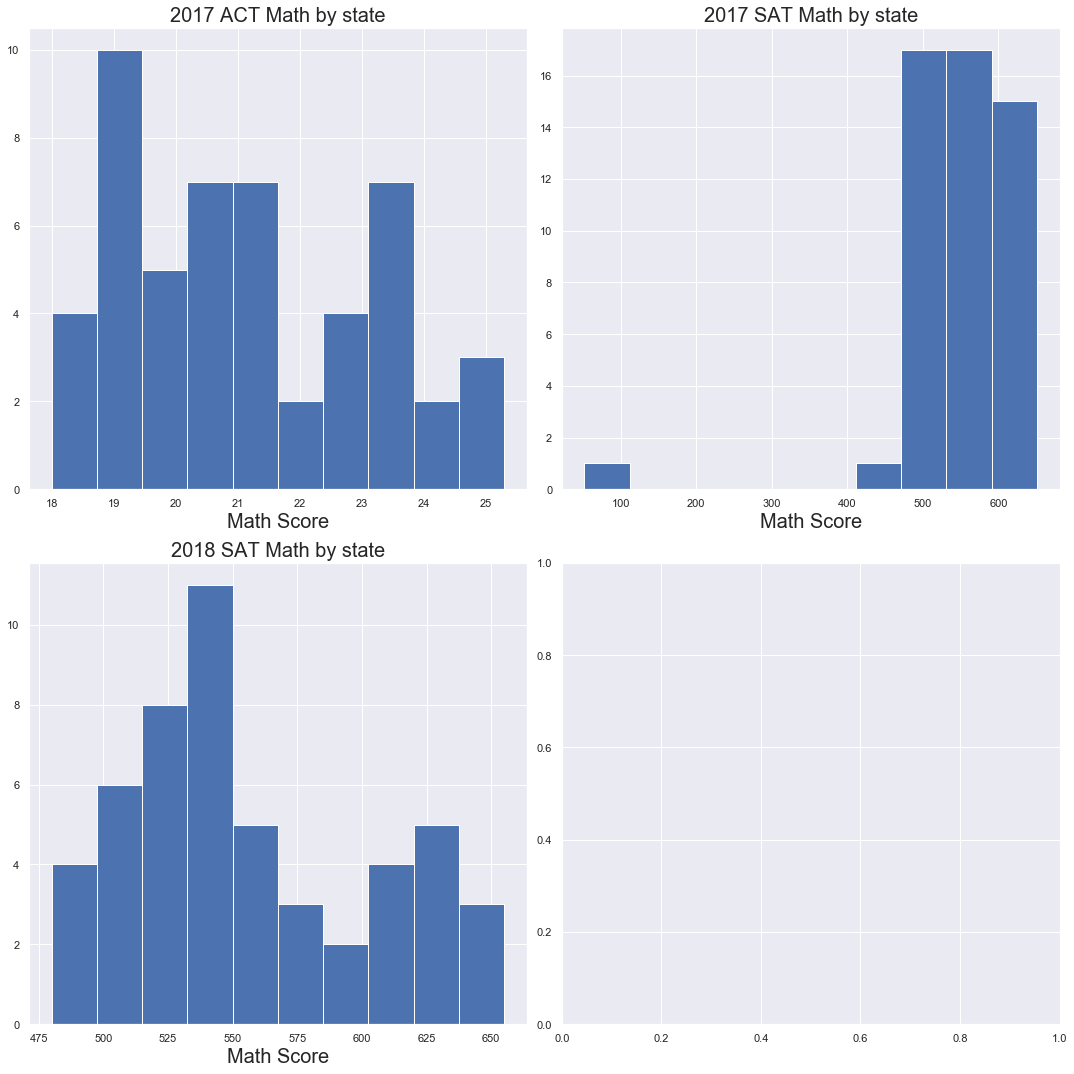

In [82]:
# Subplot Math scores for SAT & ACT(2017 & 2018) & ACT 2017 only
# Due to the use of data file 'act_2018.csv' which did not include scores for the individual subjects thus,
# only ACT 2017 individual subjects are plotted.

subplot_histograms(final,
                   ['2017_ACT_Math', '2017_SAT_Math', '2018_SAT_Math'],
                   
                   ['2017 ACT Math by state', '2017 SAT Math by state', '2018 SAT Math by state'],
                   
                   ['Math Score', 'Math Score', 'Math Score'])
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)

Math scores are almost the same for both tests. The 2017_SAT_Math has an outlier. A quick check on the internet shows that there was a typo in the Math score; which should 524 instead of 52.

https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/

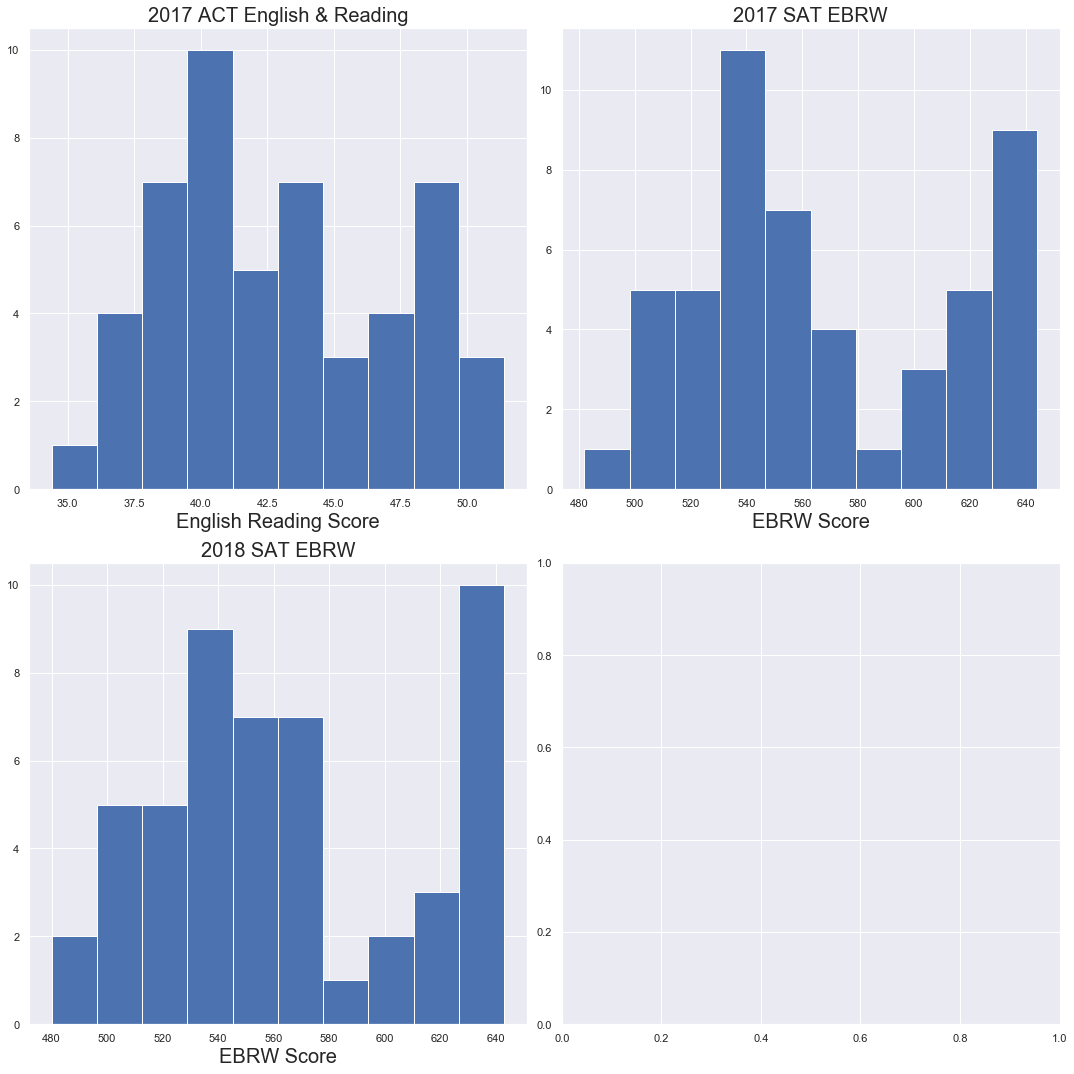

In [83]:
# Subplot Reading/verbal scores for SAT (2017 & 2018) & ACT 2017 only
# Due to the use of data file 'act_2018.csv' which did not include scores for the individual subjects thus,
# only ACT 2017 individual subjects are plotted.

subplot_histograms(final_c,
                   ['2017_ACT_ER', '2017_SAT_EBRW', '2018_SAT_EBRW'],
                   
                   ['2017 ACT English & Reading', '2017 SAT EBRW', '2018 SAT EBRW'],
                   
                   ['English Reading Score', 'EBRW Score', 'EBRW Score'])
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)


From the graph, the reading and writing skills of students for both tests are almost the same.

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


Text(0.5, 1.0, 'SAT vs. ACT math scores for 2017')

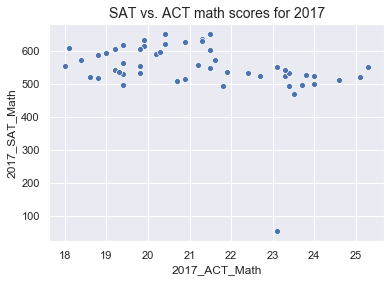

In [84]:
# SAT vs. ACT math scores for 2017
ax = sns.scatterplot(x = final['2017_ACT_Math'], y = final['2017_SAT_Math'], data = final)
plt.title('SAT vs. ACT math scores for 2017', fontsize = 14) 

Other than the outlier for SAT which was mentioned above ie, a type error where it should be 524 instead of 52 for Maryland, scores are spread out between around 500 and 650 for SAT and between 18 and 25 for ACT. It is difficult to tell which test has a smaller (ie, consistent) dispersion. 

However, Coefficient of Variation should be able to help in this regards. It shows the extent of variability in relation to the mean of the population. 

Formula: The coefficient of variation (CV) is defined as the ratio of the standard deviation to the mean.

CoV for SAT (with outlier not fixed) = 15.6%
Cov for SAT (mean is 556.88 after correcting outlier) = 15.2%
CoV for ACT = 9%

The distribution of ACT scores is not as dispersed as SAT. 

Coefficient of variation gives a sense of "relative variability," as reported by the GraphPad Statistical software website. It can be expressed either as a fraction or a percent.

Coefficient of variance (CV) is used to understand the scatter of variables that are expressed in different units. For example, the coefficient of variation for blood pressure can be compared with the coefficient of variation for pulse rate. In this case, blood pressure and pulse rate are two different variables as in ACT and SAT.

(http://en.wikipedia.org/wiki/Coefficient_of_variation). Since this is independent of the unit of measure of a sample/distribution, it is perfect for comparison of the dispersion.


In [ ]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2,figsize=(15,15)) # To specify  figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column])
        ax[i].set_xlabel(list_of_xlabels[i], fontsize=20)
        ax[i].set_title(list_of_titles[i], fontsize=20)

Text(0.5, 1.0, 'SAT vs. ACT verbal/reading scores for 2017')

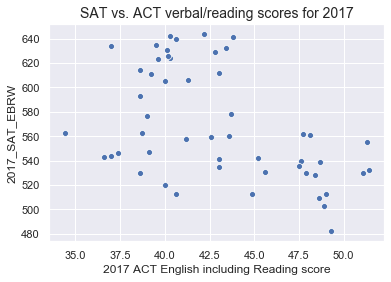

In [91]:
# SAT vs. ACT verbal/reading scores for 2017
ax = sns.scatterplot(x = final['2017_ACT_English'] + final['2017_ACT_Reading'], y = final['2017_SAT_EBRW'], data = final)
plt.xlabel('2017 ACT English including Reading score', fontsize = 12)
plt.title('SAT vs. ACT verbal/reading scores for 2017', fontsize = 14)

Text(0.5, 1.0, 'SAT vs. ACT verbal/reading scores for 2017')

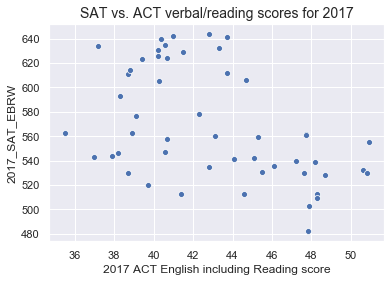

In [92]:
# SAT vs. ACT total/composite scores for 2017
ax = sns.scatterplot(x = final['2017_ACT_Composite'] + final['2018_ACT_Composite'], y = final['2017_SAT_EBRW'], data = final)
plt.xlabel('2017 ACT English including Reading score', fontsize = 12)
plt.title('SAT vs. ACT verbal/reading scores for 2017', fontsize = 14)

Text(0.5, 1.0, '2017/ 1018 SAT Scores')

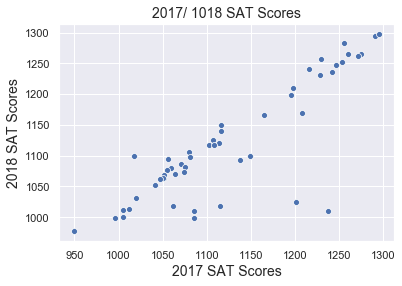

In [93]:
# Total scores for SAT 2017 vs. 2018
ax = sns.scatterplot(x = final['2017_SAT_Total'], y = final['2018_SAT_Total'], data = final)
plt.xlabel('2017 SAT Scores', fontsize = 14)
plt.ylabel('2018 SAT Scores', fontsize = 14)
plt.title('2017/ 1018 SAT Scores', fontsize = 14)

From the graph above, other than the distinct 4 outliers, it shows that the range of scores between the low and high end is about the same for the 2 years ie, between 1,000 and 1,300. 

Text(0.5, 1.0, '2017/ 1018 ACT Composite')

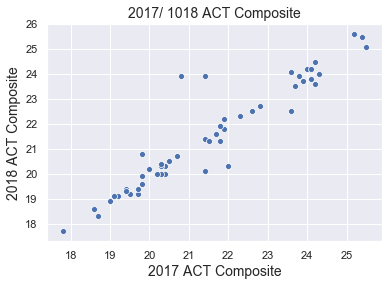

In [94]:
# Composite scores for ACT 2017 vs. 2018
ax = sns.scatterplot(x = final['2017_ACT_Composite'], y = final['2018_ACT_Composite'], data = final)
plt.xlabel('2017 ACT Composite', fontsize = 14)
plt.ylabel('2018 ACT Composite', fontsize = 14)
plt.title('2017/ 1018 ACT Composite', fontsize = 14)

The trend looks similar to that of SAT. That is, other than a few outliers, it shows that the range of scores between the low and high end is about the same for the 2 years ie, between 18.5 and 24.5. 

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

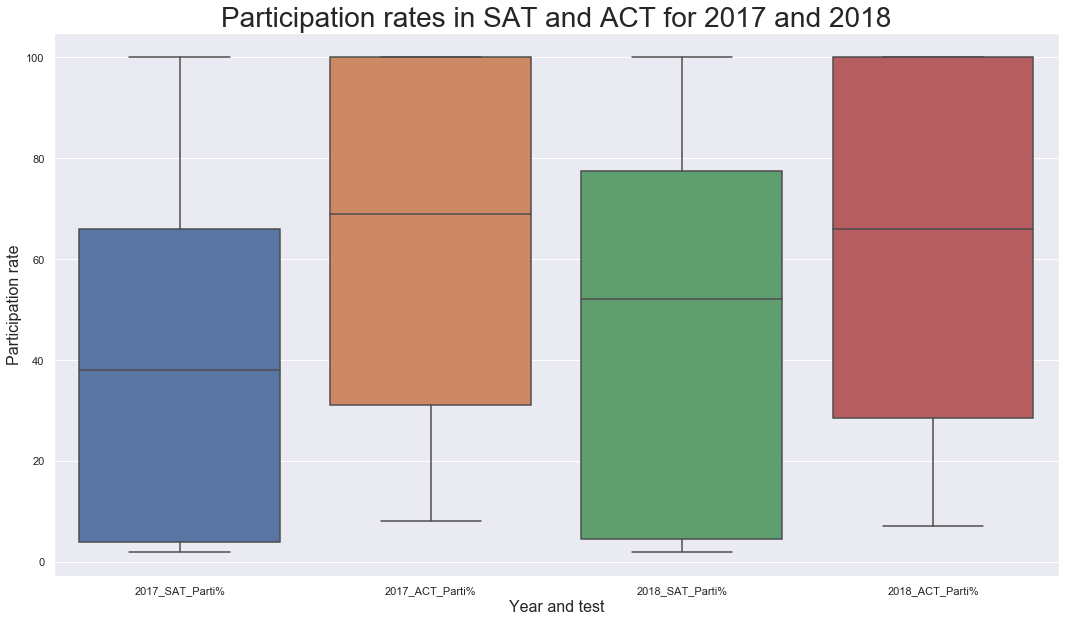

In [98]:
# Box plot for participation rate for both tests.
def box_plotter(list_of_columns, title, xlabel, ylabel):
    plt.figure(figsize=(18,10))
    participation = sns.boxplot(data=final[list_of_columns])
    plt.title(title, fontsize=28)
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

box_plotter(['2017_SAT_Parti%', '2017_ACT_Parti%', '2018_SAT_Parti%', '2018_ACT_Parti%'],
              'Participation rates in SAT and ACT for 2017 and 2018',
             'Year and test',
             'Participation rate')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

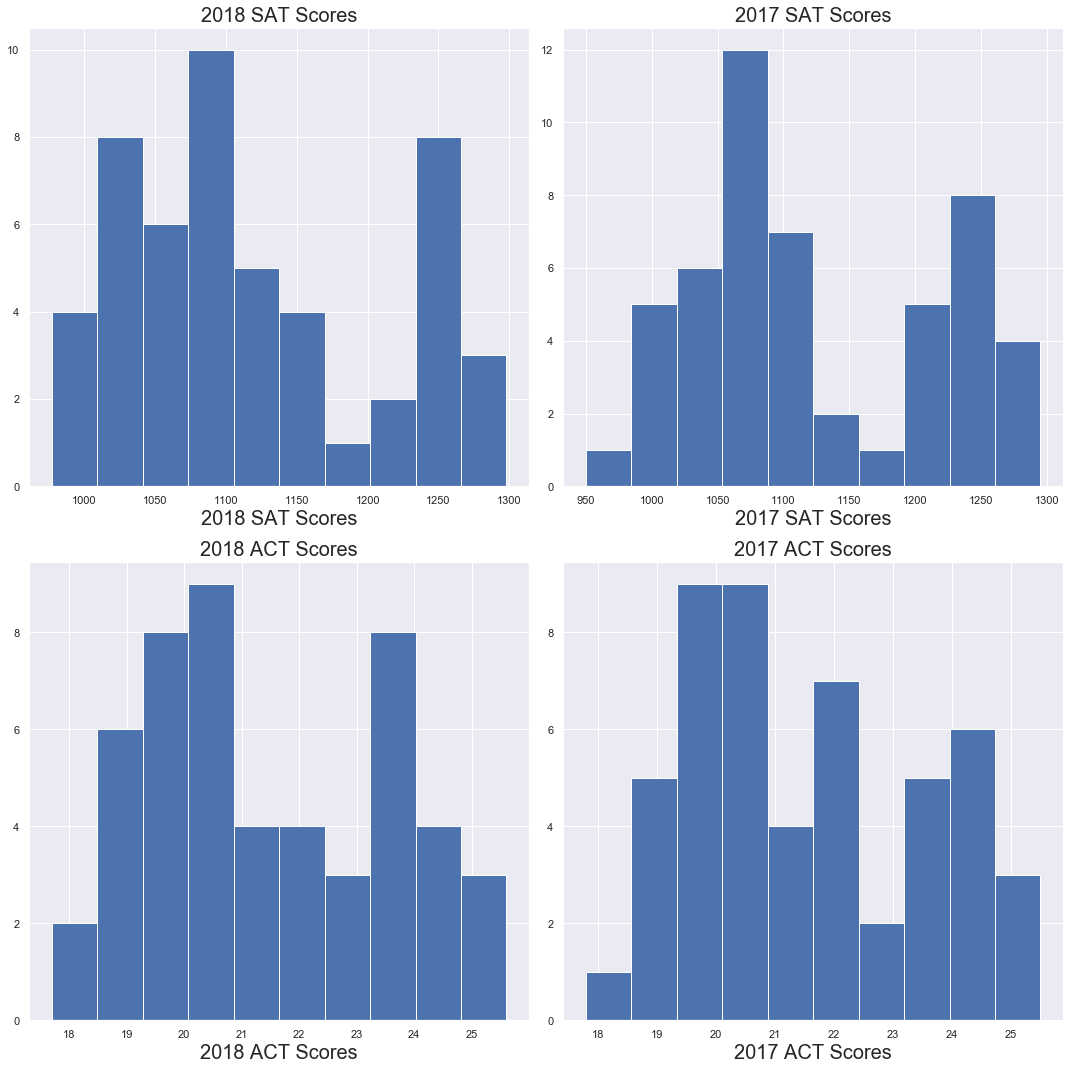

In [319]:
#plt.hist(final['2018_SAT_Total'])
subplot_histograms(final,
                   ['2018_SAT_Total', '2017_SAT_Total', '2018_ACT_Composite', '2017_ACT_Composite'],
                   
                   ['2018 SAT Scores', '2017 SAT Scores', '2018 ACT Scores', '2017 ACT Scores'],
                   
                   ['2018 SAT Scores', '2017 SAT Scores', '2018 ACT Scores', '2017 ACT Scores'])
plt.tight_layout(pad=1, w_pad=1, h_pad=1.0)

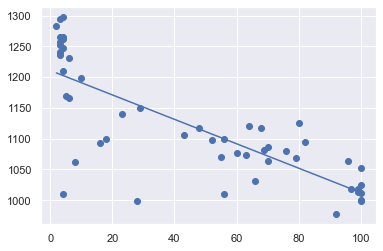

In [325]:
# Plot a scatter graph to see is there a correlation between 
# participation rate and scores. The graph clearly show that there
# is a negative correlation between participation rate and scores.
sat_x = final['2018_SAT_Parti%']
sat_y = final['2018_SAT_Total']
plt.scatter(sat_x, sat_y)
plt.plot(np.unique(sat_x), np.poly1d(np.polyfit(sat_x, sat_y, 1))(np.unique(sat_x)))

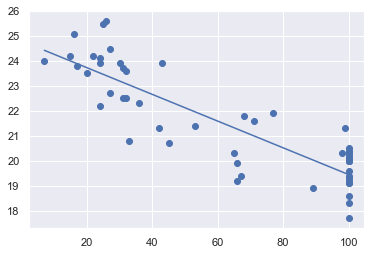

In [326]:
# Plot a scatter graph to see is there a correlation between 
# participation rate and scores. The graph clearly show that there
# is a negative correlation between participation rate and scores.
sat_x = final['2018_ACT_Parti%']
sat_y = final['2018_ACT_Composite']
plt.scatter(sat_x, sat_y)
plt.plot(np.unique(sat_x), np.poly1d(np.polyfit(sat_x, sat_y, 1))(np.unique(sat_x)))

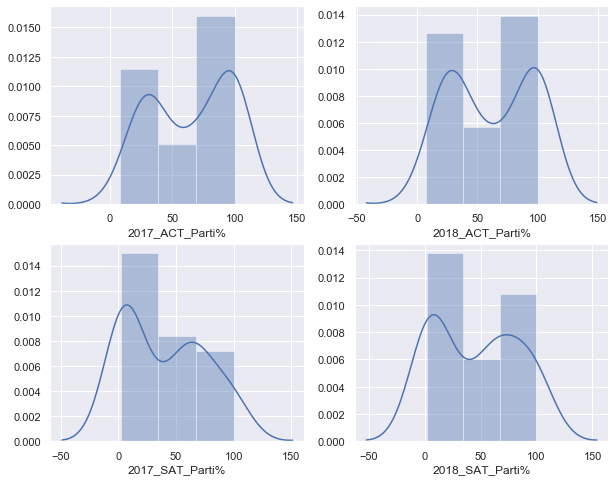

In [141]:
# Distribution plot for 2017/ 2018 ACT/ SAT Participation rate
fig = plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.distplot(final['2017_ACT_Parti%'])
#plt.title('2017_ACT_Parti%')

plt.subplot(2, 2, 2)
sns.distplot(final['2018_ACT_Parti%'])
#plt.title('2018_ACT_Parti%')

plt.subplot(2, 2, 3)
sns.distplot(final['2017_SAT_Parti%'])

plt.subplot(2, 2, 4)
sns.distplot(final['2018_SAT_Parti%'])

plt.show()

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:  

From the graphs above, scores for ACT and SAT is a bimodal distribution ie, there are twin peaks.
For SAT, overall highest scores revolve between 1,000 and 1,100 and the second peak at 1,200. And it is consistent for both years. Similarly, ACT has the same behavior. One peak between 19.5 and 20.5 and another between 23 and 24.

Referring to the participation rates for both tests, it is negatively correlated.
As explained by Dr Fred Zhang at PrepScholar, participation rate has a huge impact on scores. 
https://blog.prepscholar.com/average-sat-and-act-scores-by-stated-adjusted-for-participation-rate
Students has a tendancy to take the test that they have confident in. Thus if it is not mandatory for students to take a particular test, only 'good' students will take say, SAT. As a result, low participation rate foe that state but will high score. For states that make it mandatory to take cetain test, the participation rate is high but the average scores suffer. This explains the bimodal distribution for both tests - a small group of high score students (perhaps, well prepared) that form a peak and the rest of the average score students that form another peak (not so prepared).


We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer: Refer to answers above.

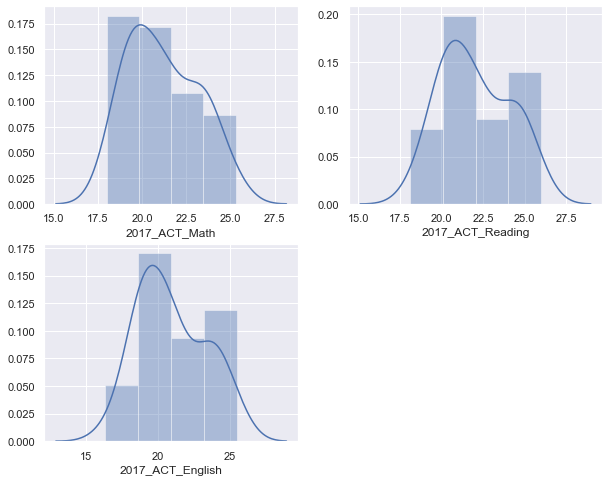

In [143]:
# Distribution plot for 2017 ACT Math, Reading, and English
fig = plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.distplot(final['2017_ACT_Math'])

plt.subplot(2, 2, 2)
sns.distplot(final['2017_ACT_Reading'])

plt.subplot(2, 2, 3)
sns.distplot(final['2017_ACT_English'])

plt.show()

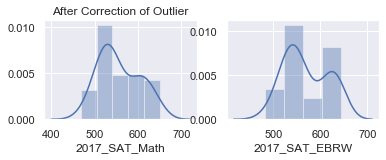

In [123]:
# Distribution plot for 2017 ACT Math, Reading, and English
fig = plt.figure()

plt.subplot(2, 2, 1)
sns.distplot(final['2017_SAT_Math'])
plt.title('After Correction of Outlier')

plt.subplot(2, 2, 2)
sns.distplot(final['2017_SAT_EBRW'])

plt.show()

State
Maine                   499
Delaware                492
Michigan                495
District of Columbia    468
Idaho                   493
Florida                 497
Name: 2017_SAT_Math, dtype: int64


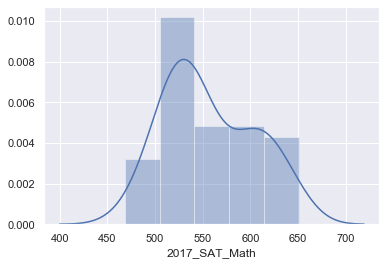

In [128]:
# Locate outlier
print(final[final['2017_SAT_Math'] < 500]['2017_SAT_Math'])

# Correct outlier and assign results to a temporary variable
df_sat_math = final['2017_SAT_Math']
df_sat_math.iloc[5,] = 524
df_sat_math.iloc[5,]

# Replot with corrected data
sns.distplot(df_sat_math)

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
With the outlier in the SAT 2017 Math, the other subjects for ACT and SAT resembling the average score distribution ie, Bimodal distribution.

After correcting the outlier ie replace 52 with 524 for Maryland and plot again, the graph for SAT Math 2017 looks better but, it is also a Bimodal distribtion.

To fix it ie, make the distribution normal, states can implement or improve their prep course/ program to assist students to perform better during exam.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Answer:

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:
# Code:

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

# Look for States that require attention.

SAT:
From the rate of change for SAT over the year from 2017 to 2018, states with declining participation rates - visit them and ask them why and areas SAT can improve to make them come back.

States with increased participation rates other than Colorado and Illinois, manage the relationship
closer so that they will not only stay but increase participation rate further.

ACT:
From the rate of change for ACT over the year from 2017 to 2018, there are 10 states with participation rate dropped between 5% and 70% which is a cause of concern.
Actions: Visit these states and ask them why and areas ACT can improve to make them come back.

States with increased participation rates Colorado and Illinois can be put on hold in terms of relationship management if resources is tight.

In [105]:
# Compute rate of change for SAT participation from 2017 to 2018.
final['SAT_Rate_of_Change'] = final['2018_SAT_Parti%'] - final['2017_SAT_Parti%']
dfsat = final[['SAT_Rate_of_Change', '2018_SAT_Parti%', '2017_SAT_Parti%']]
filt = (dfsat['SAT_Rate_of_Change'] >= -1) & (dfsat['SAT_Rate_of_Change'] < 10)
dfsat.loc[~filt].sort_values(by=['SAT_Rate_of_Change'])
# dfsat.sort_values(by=['SAT_Rate_of_Change'])

,SAT_Rate_of_Change,2018_SAT_Parti%,2017_SAT_Parti%
State,,,
Florida,-27.0,56.0,83.0
District of Columbia,-8.0,92.0,100.0
Nevada,-3.0,23.0,26.0
New York,12.0,79.0,67.0
New Jersey,12.0,82.0,70.0
West Virginia,14.0,28.0,14.0
Rhode Island,26.0,97.0,71.0
Colorado,89.0,100.0,11.0
Illinois,90.0,99.0,9.0


In [106]:
# Compute rate of change for ACT participation from 2017 to 2018.
final['ACT_Rate_of_Change'] = final['2018_ACT_Parti%'] - final['2017_ACT_Parti%']
dfact = final[['ACT_Rate_of_Change', '2018_ACT_Parti%', '2017_ACT_Parti%']]
(dfact[dfact['ACT_Rate_of_Change'] < -4]).sort_values(by=['ACT_Rate_of_Change'])

,ACT_Rate_of_Change,2018_ACT_Parti%,2017_ACT_Parti%
State,,,
Colorado,-70.0,30.0,100.0
Illinois,-50.0,43.0,93.0
Alaska,-32.0,33.0,65.0
Michigan,-7.0,22.0,29.0
Florida,-7.0,66.0,73.0
Rhode Island,-6.0,15.0,21.0
Vermont,-5.0,24.0,29.0
Virginia,-5.0,24.0,29.0
Washington,-5.0,24.0,29.0


## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

Conclusions:  
From the analysis, although there are many students fall in the average score bucket, there are measures college board can adopt to assist students to achieve their aspirations in completing SAT. 


Recommendation:

Some are some best practices to increase SAT participation taken from a survey done by Hanover Reasearch such as dismantling barriers that have historically prevented students particularly minority students from realizing the opportunites for higher education.

- Covering all or part of exam fees.
- Offer free SAT Test Prep Options and waiver of Entrance Exam fees.
- Increase budget for implementing or improving exsiting SAT education and test prep program eg, Massachusetts and Connecticut already have good education in place.
- Implement online courses and grant students free access to course materials.
- Educate and assure parents and potential SAT students that resources are available to support their SAT journey.

Bottom line: Make SAT affordable and accessible to all students.

Here is the link to a survey done by Handover Research;
https://www.hanoverresearch.com/media/Best-Practices-to-Increase-SAT-Participation-1.pdf
